In [1]:
import numpy as np
import pandas as pd
import re

# Original dataset : https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=84164ENG&_theme=1058
# The original data set has 90.000 cells but since it allows to apply filters I reduced it a lot.

data = pd.read_csv('/Users/nelly/Project_1_IH/OriginalDataSet.csv', sep=';')

data.shape
#data = data.drop('ID', axis=1)


(900, 9)

In [2]:
data.head()

,ID,Sex,EmploymentType,SectorBranchesSIC2008,Periods,EmployedPersons_1,Jobs_2,FullTimeEquivalentFte_3,HoursWorked_4
0,1475,T001038,T001413,394100,1995JJ00,29,31,25,52
1,1476,T001038,T001413,394100,1996JJ00,30,32,26,55
2,1477,T001038,T001413,394100,1997JJ00,32,35,28,59
3,1478,T001038,T001413,394100,1998JJ00,41,43,34,69
4,1479,T001038,T001413,394100,1999JJ00,45,49,38,79


In [3]:
data.drop(['ID', 'FullTimeEquivalentFte_3'], axis=1, inplace=True)

data.head()

,Sex,EmploymentType,SectorBranchesSIC2008,Periods,EmployedPersons_1,Jobs_2,HoursWorked_4
0,T001038,T001413,394100,1995JJ00,29,31,52
1,T001038,T001413,394100,1996JJ00,30,32,55
2,T001038,T001413,394100,1997JJ00,32,35,59
3,T001038,T001413,394100,1998JJ00,41,43,69
4,T001038,T001413,394100,1999JJ00,45,49,79


In [4]:
"""
In the column employment type I have three categories self-employed , employees and all.
In the column sex I have three categories men , women and Both.

I want to get rid of the rows that contain all .

EMPLOYMENT TYPE CODES
All = T001413
Employees = A045285
Self-Employed = A045286

SEX CODES
All = T001038
Men = 3000
Women = 4000

"""
index_EmploymentType = data[ data['EmploymentType'] == "T001413" ].index   
data.drop(index_EmploymentType, inplace=True)

index_SexType = data[ data['Sex'] == "T001038" ].index    
data.drop(index_SexType, inplace=True)

data.head()



,Sex,EmploymentType,SectorBranchesSIC2008,Periods,EmployedPersons_1,Jobs_2,HoursWorked_4
400,3000,A045285,394100,1995JJ00,20,22,37
401,3000,A045285,394100,1996JJ00,21,22,39
402,3000,A045285,394100,1997JJ00,22,24,42
403,3000,A045285,394100,1998JJ00,28,29,50
404,3000,A045285,394100,1999JJ00,30,33,56


In [5]:
# Identify which rows to delete and asign them to the variable index_EmploymentType

index_EmploymentType = data[ data['EmploymentType'] == "T001413" ].index
    
data.drop(index_EmploymentType, inplace=True)

data

,Sex,EmploymentType,SectorBranchesSIC2008,Periods,EmployedPersons_1,Jobs_2,HoursWorked_4
400,3000,A045285,394100,1995JJ00,20,22,37
401,3000,A045285,394100,1996JJ00,21,22,39
402,3000,A045285,394100,1997JJ00,22,24,42
403,3000,A045285,394100,1998JJ00,28,29,50
404,3000,A045285,394100,1999JJ00,30,33,56
...,...,...,...,...,...,...,...
895,4000,A045286,403405,2015JJ00,37,52,65
896,4000,A045286,403405,2016JJ00,39,54,66
897,4000,A045286,403405,2017JJ00,40,56,68
898,4000,A045286,403405,2018JJ00,41,57,69


In [6]:
data.shape

(400, 7)

In [11]:
"""

Hours worked are expressed in millions
Employed persons is expressed in thousands so I have to convert that.
Hours worked are expressed in millions

"""

data.loc[:,'EmployedPersons_1'] *= 1000

data

#print(data)

,Sex,EmploymentType,SectorBranchesSIC2008,Periods,EmployedPersons_1,Jobs_2,HoursWorked_4
400,3000,A045285,394100,1995JJ00,20000,22,37
401,3000,A045285,394100,1996JJ00,21000,22,39
402,3000,A045285,394100,1997JJ00,22000,24,42
403,3000,A045285,394100,1998JJ00,28000,29,50
404,3000,A045285,394100,1999JJ00,30000,33,56
...,...,...,...,...,...,...,...
895,4000,A045286,403405,2015JJ00,37000,52,65
896,4000,A045286,403405,2016JJ00,39000,54,66
897,4000,A045286,403405,2017JJ00,40000,56,68
898,4000,A045286,403405,2018JJ00,41000,57,69


In [8]:
"""
I want to know the total amont of women and men employed for all sector in 2017, 2018 & 2019.

"""

#data.groupby(['Sex','Periods'])['EmployedPersons_1'].agg('sum')

'\nI want to know the total amont of women and men employed for all sector in 2017, 2018 & 2019.\n\n'

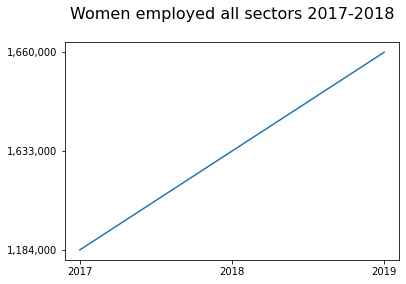

In [9]:
import matplotlib
import matplotlib.pyplot as plt

#Ploting Hours worked by men in the Telecomm sector in NL from 2010-2019 (Millions)

title = 'Women employed all sectors 2017-2018' 
year = ['2017', '2018', '2019']
employed_people = ['1,184,000','1,633,000','1,660,000']

plt.plot(year,employed_people)
plt.title(title + "\n", fontsize=16)
plt.show()


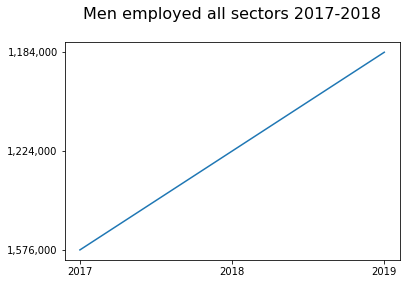

'\nThis plot seems weird ....\n'

In [10]:
#Ploting Hours worked by men in the Telecomm sector in NL from 2010-2019 (Millions)

title = 'Men employed all sectors 2017-2018' 
year = ['2017', '2018', '2019']
employed_people = ['1,576,000','1,224,000','1,184,000']

plt.plot(year,employed_people)
plt.title(title + "\n", fontsize=16)
plt.show()


"""
This plot seems weird ....
"""